## Demo for learning dual channel PSF from bead data

##### Setup environment

In [1]:
import sys
sys.path.append("..")
from psflearning.psflearninglib import psflearninglib
from psflearning import io
from psflearning.makeplots import *
import tensorflow as tf
gpus = tf.config.list_physical_devices('GPU')
tf.config.experimental.set_memory_growth(gpus[0], True)

##### Create psflearning object and load the config file
$\small\color{skyblue}{\mathrm{basefile}}$: config file with all parameters  
$\small\color{skyblue}{\mathrm{psftype}}$:  `'voxel', 'zernike'`  
$\small\color{skyblue}{\mathrm{sysfile}}$: config file with microscope specific parameters  
For advanced user, pass in base file only as below to interact with all parameters:   
```python
    L.param = io.param.combine('config_base')
```

In [2]:
L = psflearninglib()
L.param = io.param.combine(basefile='config_base',psftype='zernike',channeltype='2ch',sysfile='M2')

##### Edit user defined parameters

In [3]:
L.param.datapath = 'E:/EMBL files/data 2022/230202_Nup96SNAP_NC_M2/beads_30ms_conventional/30ms_conventional/'
L.param.savename = L.param.datapath + 'psfmodel'
L.param.keyword = 'Pos' # keyword for your data file
L.param.subfolder = 'Pos' # keyword for subfolder name if each data file is saved in a individual folder, set to '' if no subfolder
L.param.gain = 1
L.param.ccd_offset = 400
L.param.FOV.z_step = 5  
L.param.pixel_size.z = 0.05 # micron, equal to z_step*stepsize_of_the_data
L.param.ref_channel = 0 # choose the brighter channel as the reference channel, 0 or 1
L.param.roi.max_bead_number = 100 
L.param.batch_size = 50 # lower this number if out of memory 
#L.param.option.model.var_photon = True
#L.param.loss_weight.Inorm = 1

Optional parameters, change cell type to $\small\color{#318CE7}{\mathrm{Python}}$ to activate the cell
Parameter | Options | Default
--- | --- | ---
$\small\color{skyblue}{\mathrm{mirrortype}}$   | `'up-down', 'left-right'` | `'up-down'`
$\small\color{skyblue}{\mathrm{channel\_arrange}}$   | `'up-down', 'left-right'` | `'up-down'`

Optional parameters for zernike PSF learning, change cell type to $\small\color{#318CE7}{\mathrm{Python}}$ to activate the cell  
Parameter | Options | Default
--- | --- | ---
$\small\color{skyblue}{\mathrm{PSFtype}}$   | `'zernike', 'zernike_vector', 'pupil', 'pupil_vector'` | `'zernike_vector'`


In [4]:
L.param.PSFtype = 'zernike'

##### Start learning

In [5]:
images = L.load_data()
L.getpsfclass()
dataobj = L.prep_data(images)
for k in range(0,1): # increase iteration number if necessary
    psfobj,fitter = L.learn_psf(dataobj,time=0)
resfile = L.save_result(psfobj,dataobj,fitter)

E:/EMBL files/data 2022/230202_Nup96SNAP_NC_M2/beads_30ms_conventional/30ms_conventional\Pos0_30ms_conventional_Z_1\Pos0_30ms_conventional_Z_1_MMStack_Default.ome.tif
E:/EMBL files/data 2022/230202_Nup96SNAP_NC_M2/beads_30ms_conventional/30ms_conventional\Pos1_30ms_conventional_Z_1\Pos1_30ms_conventional_Z_1_MMStack_Default.ome.tif
E:/EMBL files/data 2022/230202_Nup96SNAP_NC_M2/beads_30ms_conventional/30ms_conventional\Pos10_30ms_conventional_Z_1\Pos10_30ms_conventional_Z_1_MMStack_Default.ome.tif
E:/EMBL files/data 2022/230202_Nup96SNAP_NC_M2/beads_30ms_conventional/30ms_conventional\Pos11_30ms_conventional_Z_1\Pos11_30ms_conventional_Z_1_MMStack_Default.ome.tif
E:/EMBL files/data 2022/230202_Nup96SNAP_NC_M2/beads_30ms_conventional/30ms_conventional\Pos2_30ms_conventional_Z_1\Pos2_30ms_conventional_Z_1_MMStack_Default.ome.tif
E:/EMBL files/data 2022/230202_Nup96SNAP_NC_M2/beads_30ms_conventional/30ms_conventional\Pos3_30ms_conventional_Z_1\Pos3_30ms_conventional_Z_1_MMStack_Default.om

3/6: learning: 56/100 [00:06s]  8.82it/s, current loss: 1.04150, total time: 6.34s
3/6: learning: 52/100 [00:05s]  9.68it/s, current loss: 2.24558, total time: 11.71s 
3/6: learning: 118/250 [00:27s]  4.33it/s, current loss: 3.37930, total time: 38.96s   
4/6: calculating spline coefficients: 2/2 [00:03s]  1.86s/it total time: 42.67s
5/6: localization: 5/5 [00:07s]  1.58s/it total time: 50.56s


outlier id: [ 2  5 16 20 21 27 31 33 36 38 43 54]
rois shape channel 0: (44, 48, 21, 21)
rois shape channel 1: (44, 48, 21, 21)


3/6: learning: 63/250 [00:07s]  8.37it/s, current loss: 1.49079, total time: 58.08s  
4/6: calculating spline coefficients: 2/2 [00:03s]  1.84s/it total time: 61.75s
5/6: localization: 5/5 [00:07s]  1.46s/it total time: 69.07s
6/6: saving results: [00:00s] total time: 69.21s


##### Show results

In [6]:
f,p = io.h5.load(resfile) # load result file

In [8]:
print('output parameters')
print('f:\n    ',list(f.keys()))
print(' locres:\n    ',list(f.locres.keys()))
print(' res:\n    ',list(f.res.keys()))
print(' rois:\n    ',list(f.rois.keys()))

output parameters
f:
     ['locres', 'res', 'rois']
 locres:
     ['CRLB', 'LL', 'P', 'coeff', 'loc']
 res:
     ['T', 'channel0', 'channel1', 'imgcenter', 'xyshift']
 rois:
     ['cor', 'fileID', 'image_size', 'psf_data', 'psf_fit']


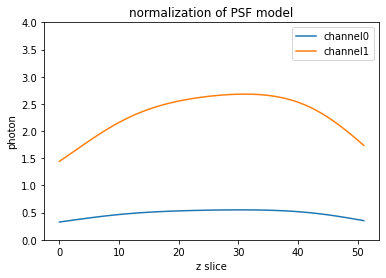

In [8]:
plt.plot(np.sum(f.res.channel0.I_model,axis=(-1,-2)),label='channel0')
plt.plot(np.sum(f.res.channel1.I_model,axis=(-1,-2)),label='channel1')
plt.ylim([0,4])
plt.xlabel("z slice")
plt.ylabel("photon")
plt.title("normalization of PSF model")
plt.legend()
plt.show()

channel 0


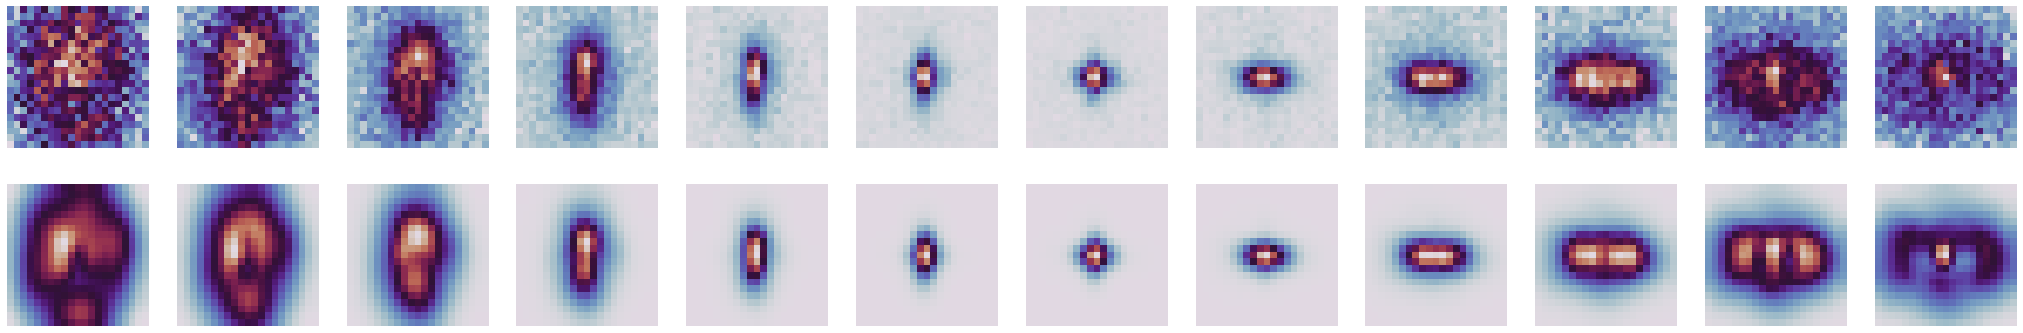

channel 1


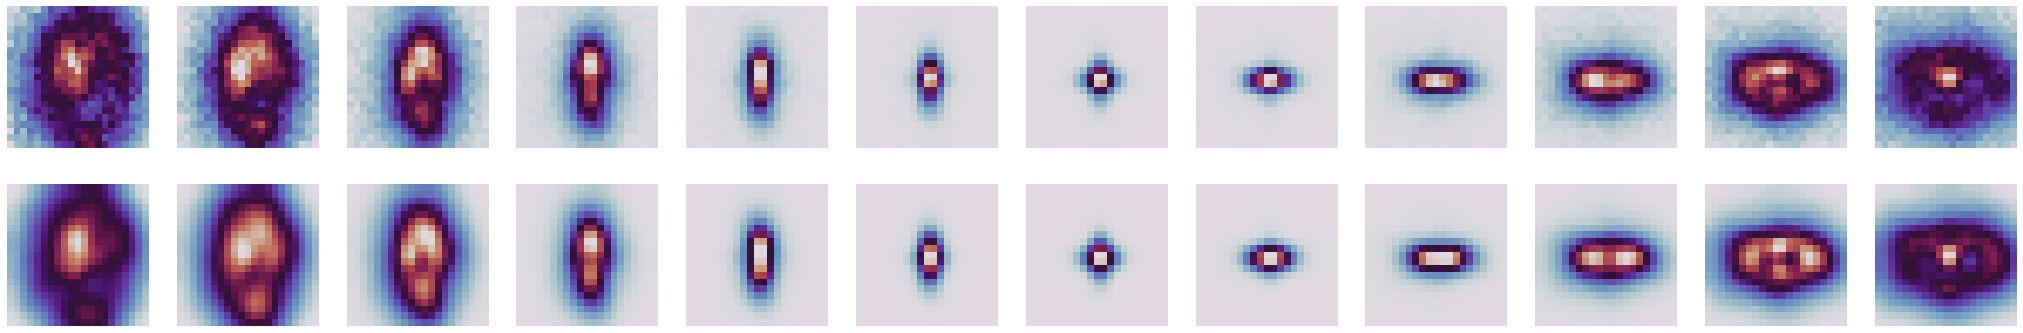

In [9]:
showpsfvsdata(f,p,index=0)

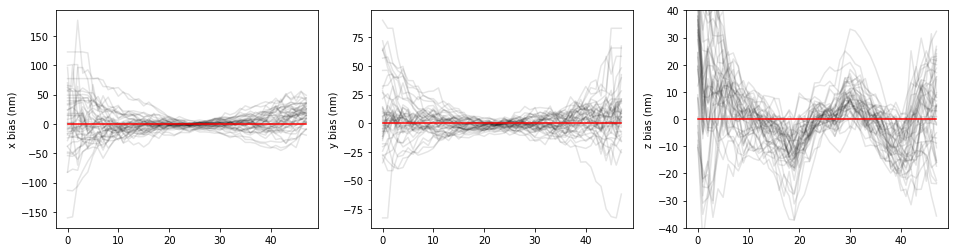

In [10]:
showlocalization(f,p)

##### Optional plots

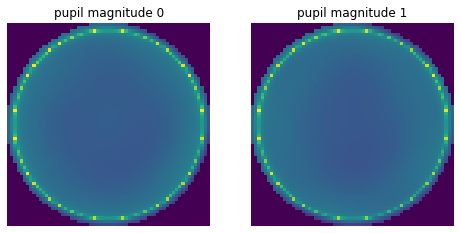

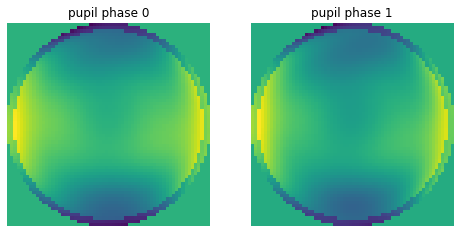

In [12]:
try:
    showpupil(f,p)
except:
    print('no pupil')

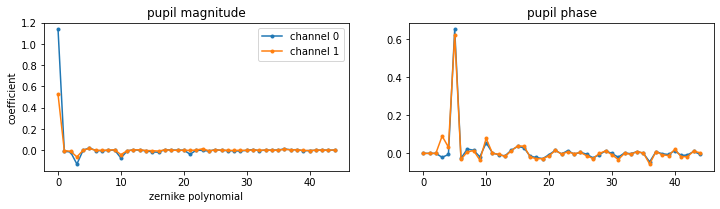

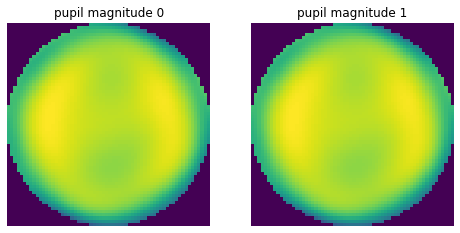

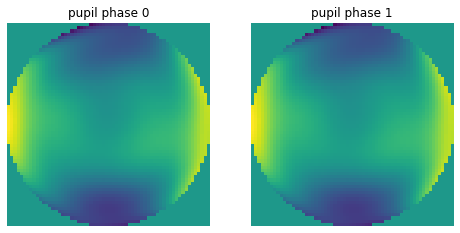

In [13]:
try:
    showzernike(f,p)
except:
    print('no Zernike coefficients')

[[ 0.9991  0.0365 -0.    ]
 [-0.0359  1.0005  0.    ]
 [ 0.3387  1.6264  1.    ]]


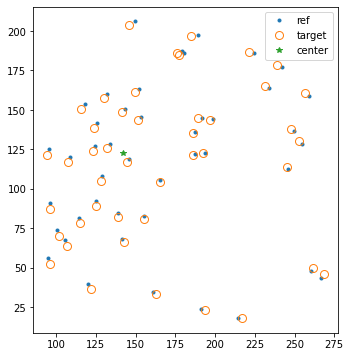

In [12]:
showtransform(f)
np.set_printoptions(precision=4,suppress=True)
print(f.res.T)

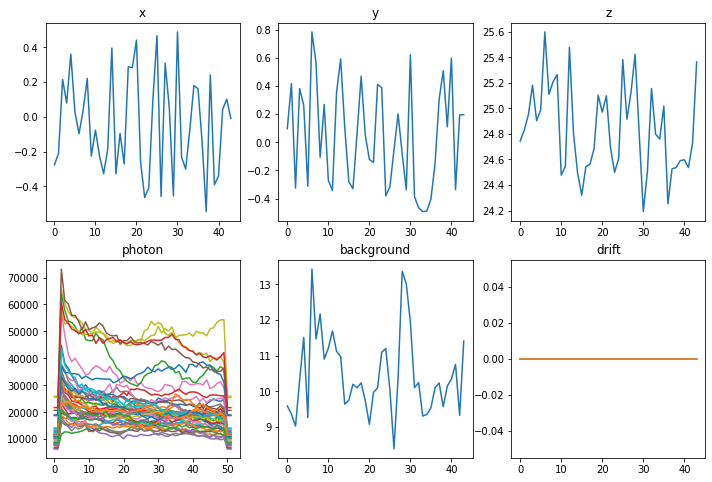

In [11]:
showlearnedparam(f,p)